In [18]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.utils.validation import check_is_fitted


In [90]:
# URL of the CSV file
url = "https://raw.githubusercontent.com/amankharwal/Website-data/master/marketing_campaign.csv"
df = pd.read_csv(url, sep=';', index_col='ID')

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2240 entries, 5524 to 9405
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year_Birth           2240 non-null   int64  
 1   Education            2240 non-null   object 
 2   Marital_Status       2240 non-null   object 
 3   Income               2216 non-null   float64
 4   Kidhome              2240 non-null   int64  
 5   Teenhome             2240 non-null   int64  
 6   Dt_Customer          2240 non-null   object 
 7   Recency              2240 non-null   int64  
 8   MntWines             2240 non-null   int64  
 9   MntFruits            2240 non-null   int64  
 10  MntMeatProducts      2240 non-null   int64  
 11  MntFishProducts      2240 non-null   int64  
 12  MntSweetProducts     2240 non-null   int64  
 13  MntGoldProds         2240 non-null   int64  
 14  NumDealsPurchases    2240 non-null   int64  
 15  NumWebPurchases      2240 non-null   int

In [21]:
# Return the number of missing values in each column
for col in df.isnull().sum().index:
    if df[col].isnull().sum() > 0:
        print(f'{col} has {df[col].isnull().sum()} missing values')
        # Drop the rows with missing values
        df.dropna(inplace=True)
        print(f'{col} has {df[col].isnull().sum()} missing values')

Income has 24 missing values
Income has 0 missing values


In [92]:
df.head(2).T

ID,5524,2174
Year_Birth,1957,1954
Education,Graduation,Graduation
Marital_Status,Single,Single
Income,58138.0,46344.0
Kidhome,0,1
Teenhome,0,1
Dt_Customer,2012-09-04,2014-03-08
Recency,58,38
MntWines,635,11
MntFruits,88,1


## EDA

In [94]:
# ID column
if df.index.nunique() == df.shape[0]:
    print("No duplicate ID")
else:
    print("Duplicate ID")

No duplicate ID


In [95]:
Birth_Year = []
for i in df['Year_Birth']:
    pd.to_datetime(i, format='%Y')
    Birth_Year.append(pd.to_datetime(i, format='%Y', errors='coerce'))

df['Year_Birth'] = Birth_Year
df['Year_Birth'] = df['Year_Birth'].dt.year

Customer_Since = []
for i in df['Dt_Customer']:
    pd.to_datetime(i, format='%Y-%m-%d')
    Customer_Since.append(pd.to_datetime(i, format='%Y-%m-%d', errors='coerce'))

df['Dt_Customer'] =  Customer_Since
assert df['Dt_Customer'].dtype == 'datetime64[ns]', "Dt_Customer does not have datetime datatype"

df['Age'] =  datetime.now().year - df['Year_Birth']
df.drop('Year_Birth', axis=1, inplace=True)

df['Customer_Tenure'] = datetime.now().year - df['Dt_Customer'].dt.year
df.drop('Dt_Customer', axis=1, inplace=True)

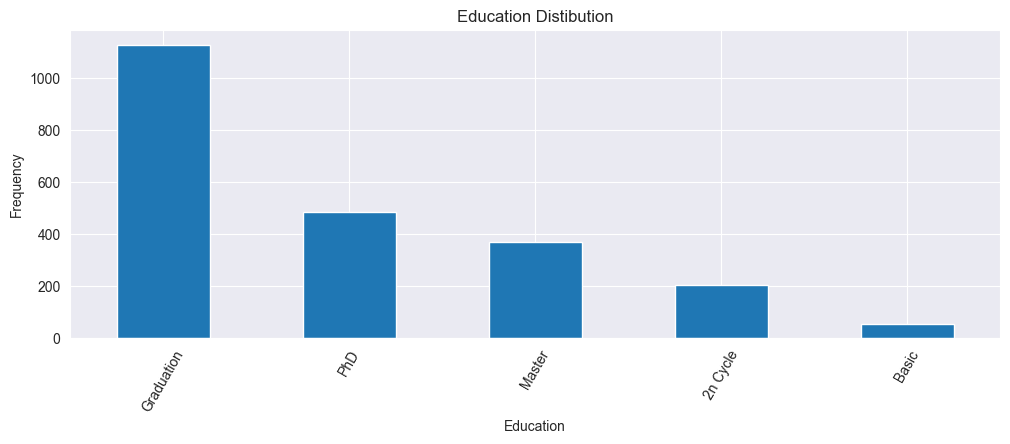

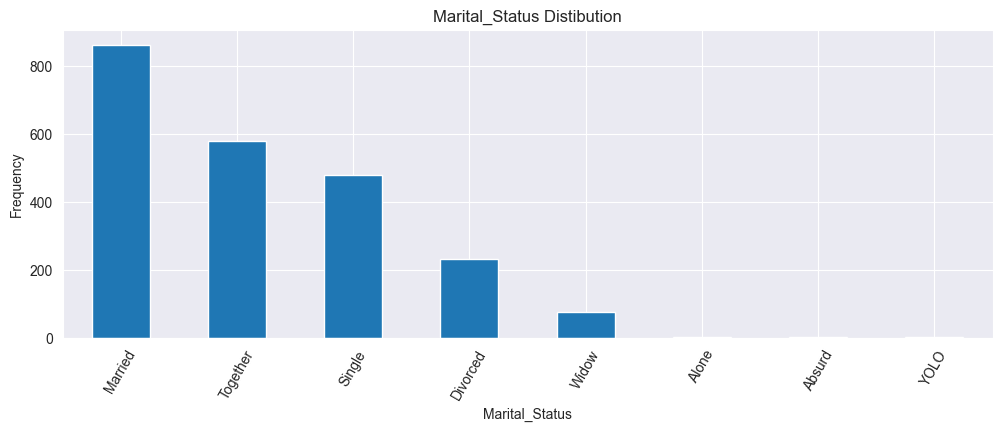

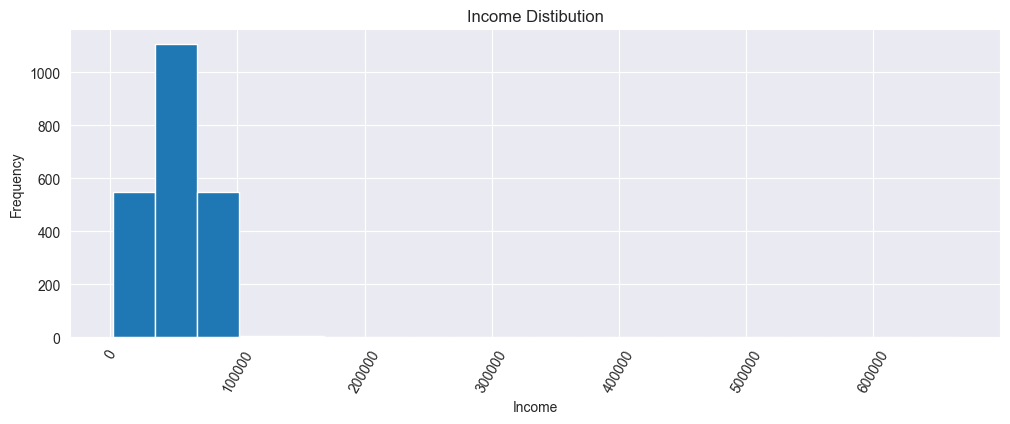

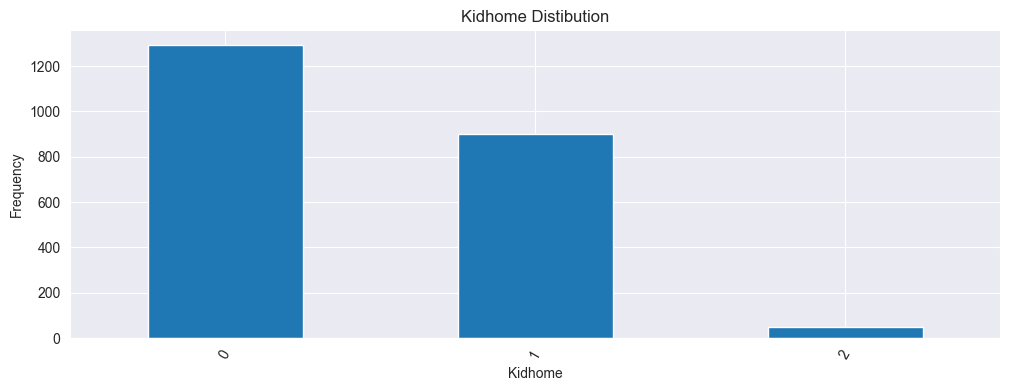

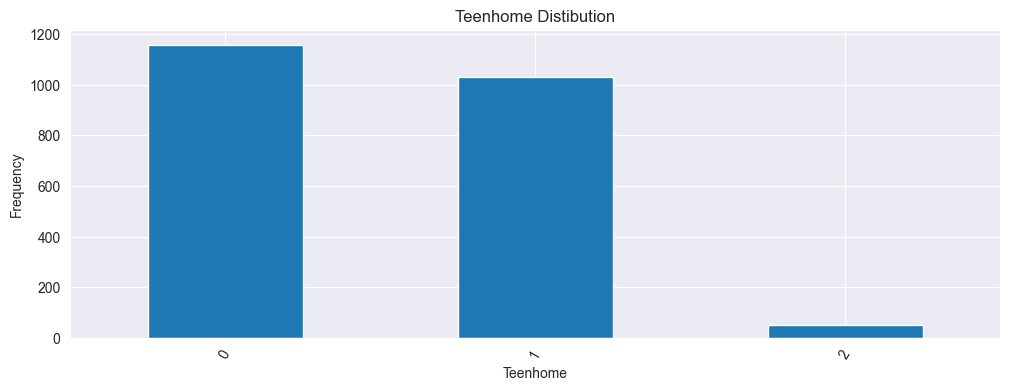

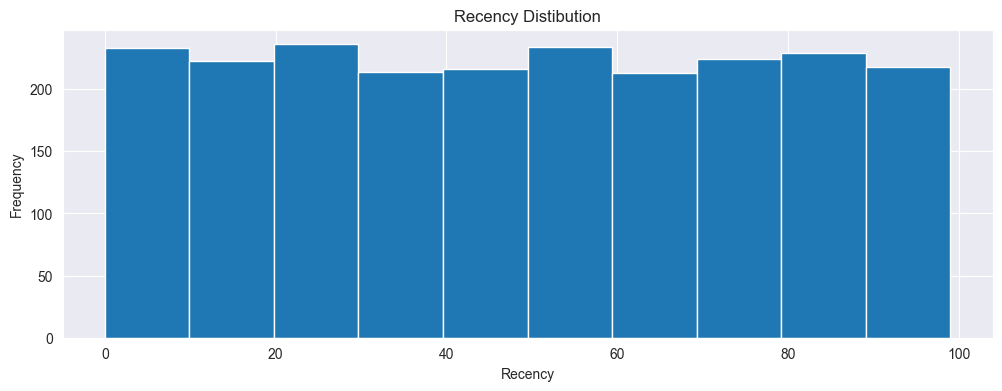

In [103]:
poeple_cols = df.columns[0:6]

int_cols = []

for col in poeple_cols:
    if df[col].dtype == 'object':
        plt.figure(figsize=(12, 4)) # Create a new figure for each plot
        df[col].value_counts().plot(kind='bar')
        plt.title(f'{col} Distibution')
        plt.xlabel(f'{col}')
        plt.ylabel('Frequency')
        plt.xticks(rotation=60)
        
    elif df[col].dtype == 'int64' and col != 'Recency':
        plt.figure(figsize=(12, 4)) # Create a new figure for each plot
        df[col].value_counts().plot(kind='bar')
        plt.title(f'{col} Distibution')
        plt.xlabel(f'{col}')
        plt.ylabel('Frequency')
        plt.xticks(rotation=60)

    elif df[col].dtype == 'float':
        plt.figure(figsize=(12, 4)) # Create a new figure for each plot
        plt.hist(df[col], bins=20)
        plt.title(f'{col} Distibution')
        plt.xlabel(f'{col}')
        plt.ylabel('Frequency')
        plt.xticks(rotation=60)
    
    elif col == "Recency":
        plt.figure(figsize=(12,4))
        plt.hist(df[col])
        plt.title(f'{col} Distibution')
        plt.xlabel(f'{col}')
        plt.ylabel('Frequency')


In [64]:
df.columns

Index(['ID', 'Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome',
       'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Complain', 'Z_CostContact', 'Z_Revenue', 'Response', 'Age',
       'Customer_Tenure'],
      dtype='object')

MntFishProducts Total Expeniture:84057
MntSweetProducts Total Expeniture:60621
MntGoldProds Total Expeniture:98609
NumDealsPurchases Total Expeniture:5208
NumWebPurchases Total Expeniture:9150
NumCatalogPurchases Total Expeniture:5963


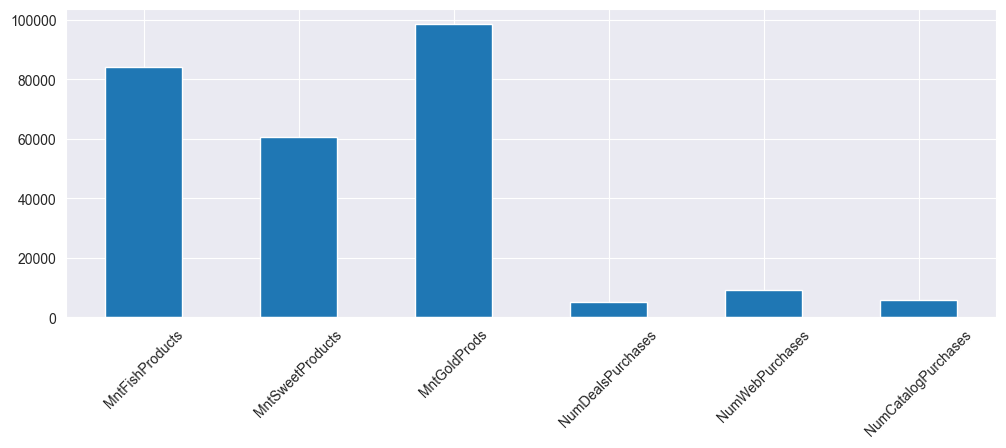

In [104]:
products_col = df.columns[9:15]
plt.figure(figsize=(12,4))
df[products_col].sum().plot(kind='bar')
plt.xticks(rotation=45)
for col in products_col:
    print(f'{col} Total Expeniture:{df[col].sum()}')
sns.set_style('darkgrid')

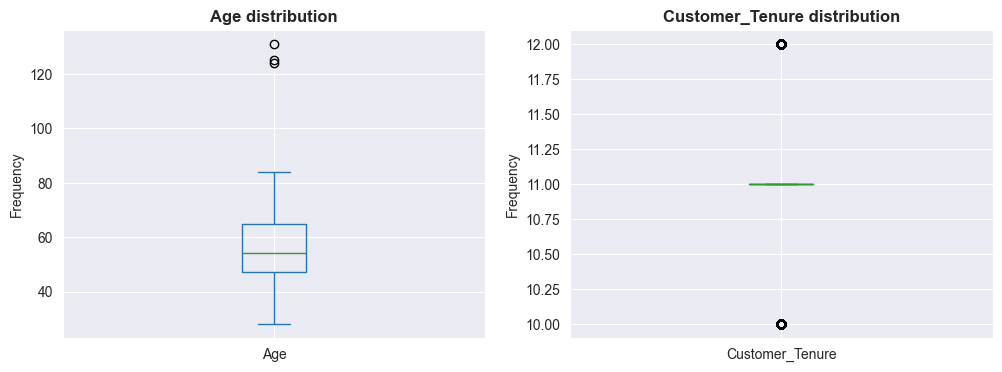

In [105]:
# Let's see the data disribution
plt.figure(figsize=(12, 4))

subplot_index = 1 # Initailize counter for subplot index

for col in df[['Age', 'Customer_Tenure']].columns:
    plt.subplot(1, 2, subplot_index)
    df[col].plot(kind = 'box', title = f'Distribution of {col} Reading')
    plt.ylabel('Frequency')
    plt.title(f'{col} distribution', weight='bold')

    subplot_index += 1 # Increment the subplot index

In [132]:
# Since we can't drop use all features we'll peak the features with the hightest variance

int_df = df.select_dtypes(include=['int64'])
int_df = int_df.var().sort_values(ascending=False)

# print(int_df.var().sort_values(ascending=False))
# print(type(int_df.var().sort_values(ascending=False)))

high_var_cols = []
for col in int_df.index:
    if int_df[col] > 1:
        high_var_cols.append(col)

In [ ]:
for col in df.isnull().sum().index:
    if df[col].isnull().sum() > 0:
        print(f'{col} has {df[col].isnull().sum()} missing values')
        # Drop the rows with missing values
        df.dropna(inplace=True)
        print(f'{col} has {df[col].isnull().sum()} missing values')

In [88]:
# drop columns we wont use
columns_to_drop = df.columns[18:-2]
# df = df.drop(columns=columns_to_drop, inplace=True)

<code>sqrt((x1-c)**2 + (x2-c)**2) + ...)</code>